Markov Chains
===========

# Theory
**Markov Chain (MC)** are a special case of the more general concept of stochastic processes.

## Definition
**Markov Chain (MC)** a stochastic process describing a sequence of possible events in which the probability of each event depends only on the state attained in the previous event. There are two variants of **MC**'s:
- Discrete-Time Markov Chains
- Continuous-Time Markov Chains

The stationary distribution is obtained through two approaches
- Limiting results "iterative stepping in $n$" i.e. simulating the markov process $n$ times
- Steady State Results "solving linear system of equations"

Limiting results
$$
\lim_{n \rightarrow \infin} P^{(n)} = P
$$

The matrix power indicate that we sum over the state proportions/probability while we simulate the markov process $n$ times

As for the steady State Results, the stationary distribution is derived from the relation 
$$
\mathbf{\pi} P = \mathbf{\pi}
$$
Rearranging the terms
$$
\mathbf{\pi} (P-I) = 0
$$

solving this system would give that $\pi = 0$, which not what we want. So to solve for stationary distribution, we consider the following constraint on $\pi$

$$
\pi_1 + \pi_2 + \dots + \pi_n = 1
$$

Embedding this constraint in our system would result a new $n\times n+1$ matrix $Q$ and new r.h.s.  $1 \times n+1$ vector $b$
$$
\mathbf{\pi} Q = b
$$

To solve it, i.e. having $Q^{-1}$ we solve this system
$$
\mathbf{\pi} QQ^T = bQ^T
$$



### Algorithm


## Examples


# Implementation


## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import matrix_power

## Parameters

In [4]:
# transition matrix
P = np.array([
    [0.5, 0.3, 0.1, 0.1],
    [0.0, 0.6, 0.38, 0.02],
    [0.33, 0.27, 0.28, 0.12],
    [0.05, 0.35, 0.6, 0.0],
])


# P = np.array([
#     [0, 1],
#     [1, 0]
# ])


## Algorithm


In [5]:
def MC(P: np.array, method: str ="limiting results", n: int =100) -> np.array:
    '''
    Compute the stationary distribution of discrete time and space markov chain process

    Args:
        P: Markov process transition matrix
        method: Method of computing the stationary distribution. Defaults to "limiting results".

    Returns:
        steady state distribution
    '''

    if method == "limiting results":
        pi = matrix_power(P,n)[0]
    elif method == "steady state results":
        Q = np.c_[(P - np.eye(len(P))), np.ones(len(P))]
        b = np.r_[np.zeros(len(P)), 1] 
        pi = np.linalg.solve(np.dot(Q, Q.T) ,np.dot(b, Q.T))

    return pi

In [14]:
print("", MC(P), '\n', MC(P, method="steady state results"))

 [0.20829661 0.42018129 0.30561501 0.06590709] 
 [0.20829661 0.42018129 0.30561501 0.06590709]


In [111]:
Q = np.c_[(P - np.eye(len(P))), np.ones(len(P))]
b = np.r_[np.zeros(len(P)), 1] 
pi = np.linalg.solve(np.dot(Q, Q.T) ,np.dot(b, Q.T))

pi

array([0.20829661, 0.42018129, 0.30561501, 0.06590709])

# Plotting the distribution

## Results Visualization & Behaver Analysis


/Users/abdelrahmanaltawil/opt/miniconda3/envs/ML/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abdelrahmanaltawil/opt/miniconda3/envs/ML/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abdelrahmanaltawil/opt/miniconda3/envs/ML/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


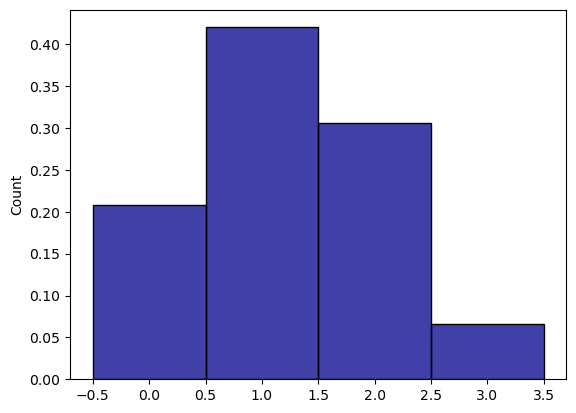

In [107]:
import seaborn as sns

sns.histplot(x=np.arange(len(P)), weights=pi, discrete=True, color='darkblue', edgecolor='black')

plt.show()

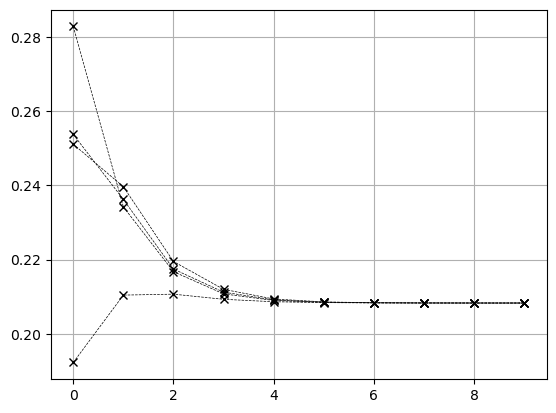

In [8]:
# or
for i in range(4):
    pi_0 = np.random.random(size=len(P))
    pi_0 = pi_0/sum(pi_0)
    pis=[]
    pi_n=pi_0
    for n in range(10):
        pi_n = pi_n@P
        pis.append(pi_n[0])
    plt.plot(pis, "x--k", linewidth=0.5)

plt.grid()

## Irreducibility

## Alternating Behavior